# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModel.tflite".
Model size 14.58984375 Kb
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


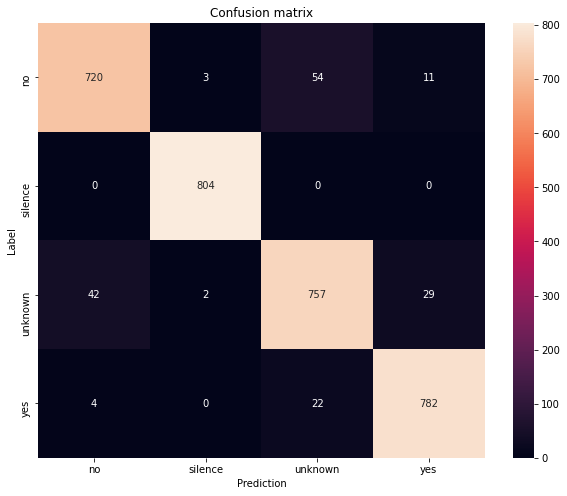

              precision    recall  f1-score   support

          no    0.93995   0.91371   0.92664       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90876   0.91205   0.91040       830
         yes    0.95134   0.96782   0.95951       808

    accuracy                        0.94830      3230
   macro avg    0.94847   0.94839   0.94836      3230
weighted avg    0.94819   0.94830   0.94818      3230

Average time: 0.26249730550098715 ms
Max time: 8.581399917602539 ms
Min time: 0.11134147644042969 ms
Using 452 samples.


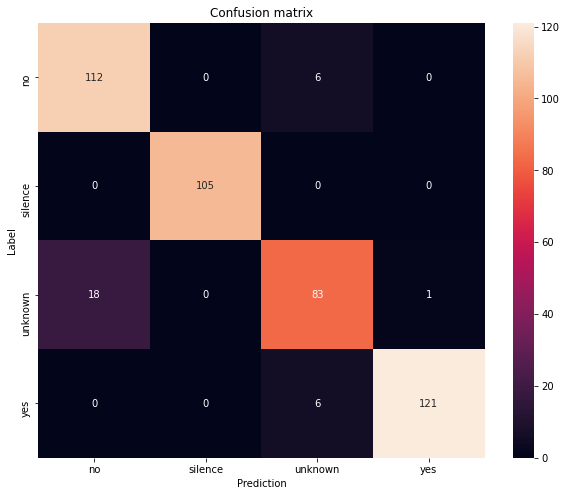

              precision    recall  f1-score   support

          no    0.86154   0.94915   0.90323       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.87368   0.81373   0.84264       102
         yes    0.99180   0.95276   0.97189       127

    accuracy                        0.93142       452
   macro avg    0.93176   0.92891   0.92944       452
weighted avg    0.93305   0.93142   0.93133       452

Average time: 0.2872959702415804 ms
Max time: 1.3339519500732422 ms
Min time: 0.11157989501953125 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path)

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQuant.tflite".
Model size 5.890625 Kb
Using 3230 samples.


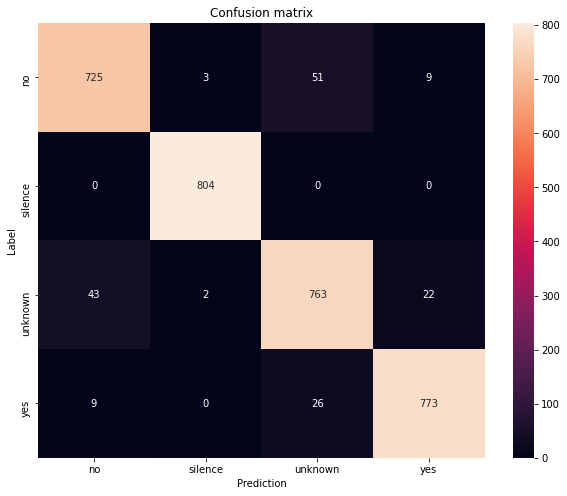

              precision    recall  f1-score   support

          no    0.93308   0.92005   0.92652       788
     silence    0.99382   1.00000   0.99690       804
     unknown    0.90833   0.91928   0.91377       830
         yes    0.96144   0.95668   0.95906       808

    accuracy                        0.94892      3230
   macro avg    0.94917   0.94900   0.94906      3230
weighted avg    0.94893   0.94892   0.94890      3230

Average time: 1.4573989637865001 ms
Max time: 21.61264419555664 ms
Min time: 0.63323974609375 ms
Using 452 samples.


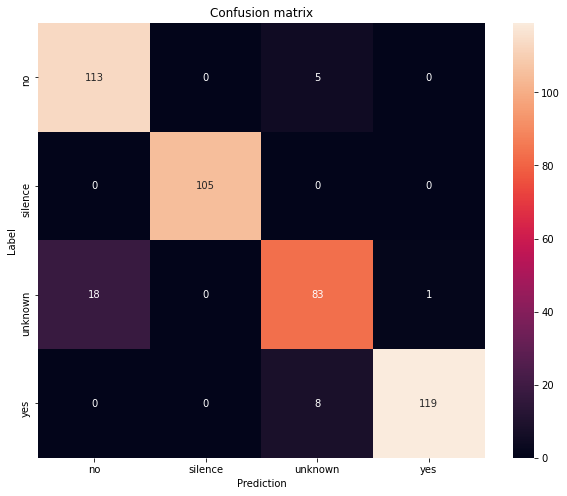

              precision    recall  f1-score   support

          no    0.86260   0.95763   0.90763       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.86458   0.81373   0.83838       102
         yes    0.99167   0.93701   0.96356       127

    accuracy                        0.92920       452
   macro avg    0.92971   0.92709   0.92739       452
weighted avg    0.93123   0.92920   0.92918       452

Average time: 1.329223666570883 ms
Max time: 7.662296295166016 ms
Min time: 0.63323974609375 ms
Quantized models perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test externa y
los datos captados con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQAT.tflite".
Model size 6.1328125 Kb
Using 3230 samples.


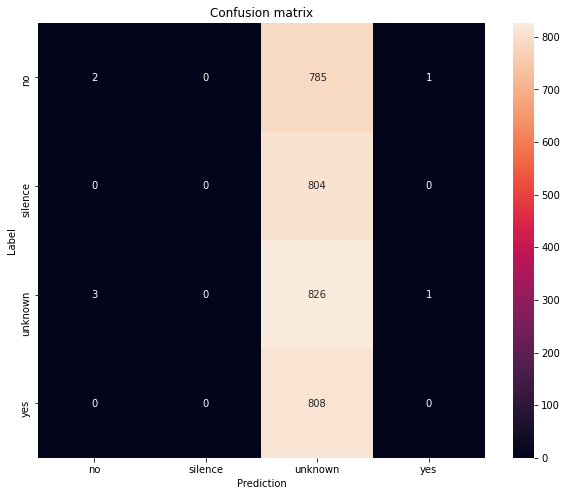

              precision    recall  f1-score   support

          no    0.40000   0.00254   0.00504       788
     silence    0.00000   0.00000   0.00000       804
     unknown    0.25628   0.99518   0.40760       830
         yes    0.00000   0.00000   0.00000       808

    accuracy                        0.25635      3230
   macro avg    0.16407   0.24943   0.10316      3230
weighted avg    0.16344   0.25635   0.10597      3230

Average time: 1.4382070063068402 ms
Max time: 7.176399230957031 ms
Min time: 0.6356239318847656 ms
Using 452 samples.


/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


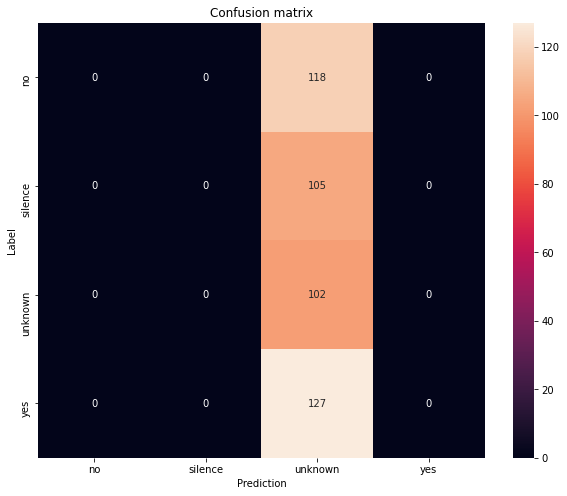

              precision    recall  f1-score   support

          no    0.00000   0.00000   0.00000       118
     silence    0.00000   0.00000   0.00000       105
     unknown    0.22566   1.00000   0.36823       102
         yes    0.00000   0.00000   0.00000       127

    accuracy                        0.22566       452
   macro avg    0.05642   0.25000   0.09206       452
weighted avg    0.05092   0.22566   0.08310       452

Average time: 1.651559255819405 ms
Max time: 13.496637344360352 ms
Min time: 0.6358623504638672 ms
Quantized models perform slower as they are intended to work on ARM devices.


/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

